In [34]:
import glob
import igraph as ig
import numpy as np
import xnetwork as xn
import matplotlib.pyplot as plt

from matplotlib.ticker import MaxNLocator

In [42]:
files = glob.glob('subset_chu/citation_net_*_voting_schema_261022.xnet')
print(files) # verificar quais foram as redes enviadas paara o filipi

['subset_chu/citation_net_acs appl. mater. interfaces_voting_schema_261022.xnet', 'subset_chu/citation_net_acs nano_voting_schema_261022.xnet', 'subset_chu/citation_net_adv. funct. mater._voting_schema_261022.xnet', 'subset_chu/citation_net_adv. mater._voting_schema_261022.xnet', 'subset_chu/citation_net_chem. mat._voting_schema_261022.xnet', 'subset_chu/citation_net_j. am. chem. soc._voting_schema_261022.xnet', 'subset_chu/citation_net_j. mat. chem. b_voting_schema_261022.xnet', 'subset_chu/citation_net_j. mater. chem. a_voting_schema_261022.xnet', 'subset_chu/citation_net_j. mater. chem. c_voting_schema_261022.xnet', 'subset_chu/citation_net_j. mater. chem._voting_schema_261022.xnet', 'subset_chu/citation_net_langmuir_voting_schema_261022.xnet', 'subset_chu/citation_net_macromolecules_voting_schema_261022.xnet', 'subset_chu/citation_net_nano lett._voting_schema_261022.xnet', 'subset_chu/citation_net_nat. mater._voting_schema_261022.xnet', 'subset_chu/citation_net_nat. nanotechnol._vo

In [61]:
files = ['subset_chu/citation_net_j. am. chem. soc._voting_schema_261022.xnet']
# files = ['subset_chu/citation_net_nat. mater._011122_voting_schema_bardo_infomap_01112022.xnet']

In [37]:

# def voting_schema(label, years, net_ami, valid):
#     net_ami.vs['cluster_name'] = net_ami.vs['Cluster Name']
#     net_ami.vs['id_label'] = np.arange(net_ami.vcount())
#     net_ami.to_undirected()
#     net_ami = net_ami.components().giant()

    
#     for year in sorted(years):
#         vertex_seq = net_ami.vs.select(year_eq=year)
#         N = len(vertex_seq)
#         subg  = net_ami.subgraph(vertex_seq)
#         subg.to_undirected()
#         subg = subg.components().giant()

#         verteces = subg.vs.select(cluster_name_eq=label)
#         new_labels = []
        
#         map_new_label = dict()
#         for v in verteces:
#             temp = []
#             for n in v.neighbors():
#                 if n['cluster_name'] in valid:
#                     temp.append(n['cluster_name'])
#             unique, count = np.unique(temp, return_counts=True)
#             if len(count) > 0:
#                 idx = np.argmax(count)
#                 map_new_label[v['id_label']] = unique[idx]
#             else:
#                 map_new_label[v['id_label']]= 'unknown'
        
#         for k,v in map_new_label.items():
#             net_ami.vs[k]['new_label'] = v
        
    
# def get_neigh(net, v, valid):
#     temp = []
#     for n in v.neighbors():
#         if n['cluster_name'] in valid:
#             temp.append(n['cluster_name'])
#     return temp

In [44]:
def format_title_journal(name1):
    print(name1)
    name = name1.title()
    name = name.replace('Mater', 'Mat')
    name = name.replace('Acs', 'ACS')
    name = name.replace('Appl. Mat. Interfaces', 'AMI')
    return name

['name', 'Cluster Index', 'Cluster Name', 'cluster_top10', 'id_label', 'journal', 'refs', 'title', 'wos_id', 'year']



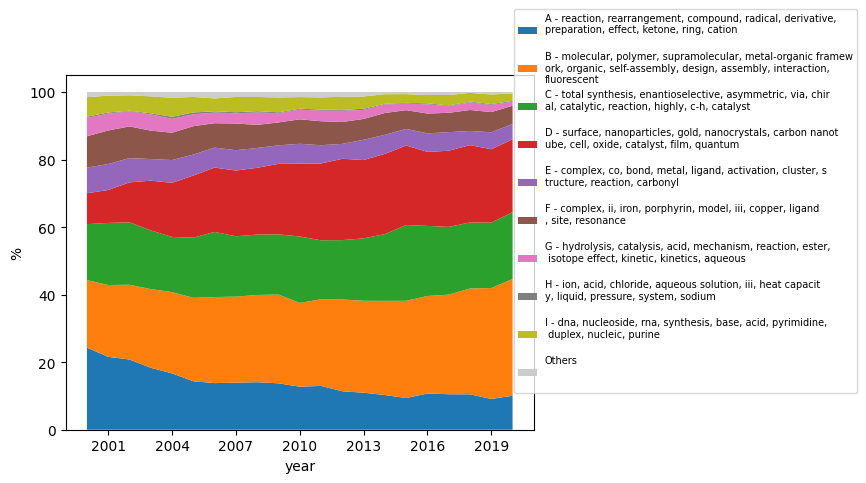

In [62]:
from collections import defaultdict

def get_k_most_close(net, v, valid):
    temp = []
    cutoff = 5
    paths = net.get_all_simple_paths(v, to=None, cutoff=cutoff)
    for n in paths:
        idx = n[-1]
        temp_label = net.vs[idx]['cluster_name']
        if temp_label in valid:
            temp.append(temp_label)
        
    return temp


def voting_schema_all_years(label, years, net_ami, valid):
    net_ami.vs['cluster_name'] = net_ami.vs['Cluster Name']
    net_ami.vs['id_label'] = np.arange(net_ami.vcount())
    new_labels = []

    verteces = net_ami.vs.select(cluster_name_eq=label)
    map_new_label = dict()
    for v in verteces:
        temp = get_k_most_close(net_ami, v, valid)        
        unique, count = np.unique(temp, return_counts=True)
        if len(count) > 0:
            idx = np.argmax(count)
            map_new_label[v['id_label']] = unique[idx]
        else:
            map_new_label[v['id_label']]= "Others"

    for k,v in map_new_label.items():
        net_ami.vs[k]['new_label'] = v
        


'''
for file in files:
    net_ami = xn.xnet2igraph(file)

    years = sorted(np.unique(net_ami.vs['year']))
    comms_size = defaultdict(lambda:[])

    
    name_unique = set(net_ami.vs['Cluster Name'])

    X = []
    for year in sorted(years):
        X.append(year)
        vertex_seq = net_ami.vs.select(year_eq=year)
        N = len(vertex_seq)
        subg  = net_ami.subgraph(vertex_seq)
        subg.to_undirected()
        subg = subg.components().giant()

        unique,count = np.unique(subg.vs['Cluster Name'], return_counts=True)
        for u,c in zip(unique, count):
            comms_size[u].append(100*c/N)

        for missing in name_unique - set(unique):
            comms_size[missing].append(0)

    net_ami.vs['new_label'] =  net_ami.vs['Cluster Name']
    comms_size_sorted = dict(sorted(comms_size.items(), key = lambda x: x[0]))
    valid = []
    count_l = 0
    for label, hist in comms_size_sorted.items():
        count_l += 1
        if count_l > 9:
            voting_schema_all_years(label, years, net_ami, valid)
        else:
            valid.append(label)
    
    net_ami.vs['cluster_top10'] = net_ami.vs['new_label']
    del net_ami.vs['new_label']
    xn.igraph2xnet(net_ami, file.replace('_011122', '_011122_voting_schema'))
    net_ami.vs['new_label'] =  net_ami.vs['Cluster Name']
'''    

#     net_ami = xn.xnet2igraph(file.replace('_180122_bardo._top7', '_voting_schema'))
#     print(net_ami.vs.attributes())
    
#     net_ami.vs['cluster_top10'] = net_ami.vs['new_label']
#     attr_to_remove = [ 'cluster name top7', 'cluster_name', 'new_label']
#     print(len(set(net_ami.vs['new_label'])))
#     for attr in attr_to_remove:
#         del net_ami.vs[attr]
#     xn.igraph2xnet(net_ami, file.replace('_180122_bardo._top7', '_voting_schema_261022'))
   
for file in files:

#     net_ami = xn.xnet2igraph(file.replace('_011122', '_011122_voting_schema'))
    net_ami = xn.xnet2igraph(file)
    print(net_ami.vs.attributes())
#     years = sorted(np.unique(net_ami.vs['year']))
    years = list(range(2000,2021))
    comms_size = defaultdict(lambda:[])
#     net_ami.vs['cluster_top10'] = net_ami.vs['new_label']
    name_unique = set(net_ami.vs['cluster_top10'])
    X = []
    for year in sorted(years):
        X.append(year)
        vertex_seq = net_ami.vs.select(year_eq=year)
        N = len(vertex_seq)
        subg  = net_ami.subgraph(vertex_seq)

        unique,count = np.unique(subg.vs['cluster_top10'], return_counts=True)
        for u,c in zip(unique, count):
            comms_size[u].append(100*c/N)

        for missing in name_unique - set(unique):
            comms_size[missing].append(0)
            
    fg = plt.figure(figsize=(12,5))
    ax = fg.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    labels = []
    hists = []
    others = []
    comms_size_sorted = dict(sorted(comms_size.items(), key = lambda x: x[0]))
    count_l = 0
    relabel = []
    for label, hist in comms_size_sorted.items():
        labels.append(label[:60] + '\n' + label[60:120] + '\n' + label[120:])
        hists.append(hist)

    cmap = plt.get_cmap("tab10")
    outer_colors = cmap(np.arange(20))
    
    outer_colors = outer_colors.tolist()
    outer_colors[9] = [0.8, 0.8, 0.8, 1]
    plt.stackplot(X, *hists, labels=labels, colors=outer_colors)

    plt.legend(prop={'size': 7}, bbox_to_anchor=(1.7,1.2))
    plt.ylabel('%')
    plt.xlabel('year')
#     plt.title(format_title_journal(file[24:-26]))
    plt.title(format_title_journal(file[24:-49]))
    plt.tight_layout()
    plt.savefig(file.replace('.xnet', '_dist_081122.pdf'))


In [22]:
for file in files:

    net_ami = xn.xnet2igraph(file.replace('_011122', '_011122_voting_schema'))
    print(net_ami.vs.attributes())
    break

['name', 'Cluster Index', 'Cluster Name', 'cluster name top7', 'cluster_name', 'id_label', 'journal', 'new_label', 'refs', 'title', 'wos_id', 'year']


In [ ]:
outer_colors